In [1]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
# Loading Data
data = pd.read_csv('./UCI_Credit_Card.csv')
# Inspecting Data; Preliminary Review 
#data.info()
print('------------------------')
#print(data.describe())
#print('------------------------')
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

predictors = data.drop(['ID','default.payment.next.month'], axis=1).as_matrix()
predictors = StandardScaler().fit_transform(predictors)
target = (data['default.payment.next.month']) 
print(target.shape[0])
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
# Calculating default Ratio
non_default = len(data[data['default.payment.next.month']==0])
default = len(data[data['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)
n_cols = predictors.shape[1]
class_weight = {0:ratio, 1:1-ratio}
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dropout(0.5))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(predictors, target, epochs=500, validation_split=0.1,
                    class_weight=class_weight)
print(len(model.layers))
print(history.history.keys())
# summarize history for accuracy

plt.plot(history.history['acc'])
print(history.history['val_acc'])
print(history.history['acc'])

plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'testing'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(model.summary)
print('train end')

/nfs01/shared_software/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


------------------------
30000
Default Ratio : 0.2212
Train on 27000 samples, validate on 3000 samples
Epoch 1/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0702 - mean_absolute_error: 0.4116 - val_loss: 0.0656 - val_mean_absolute_error: 0.3701
Epoch 2/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.3887 - val_loss: 0.0644 - val_mean_absolute_error: 0.3803
Epoch 3/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0660 - mean_absolute_error: 0.3829 - val_loss: 0.0640 - val_mean_absolute_error: 0.3986
Epoch 4/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0657 - mean_absolute_error: 0.3816 - val_loss: 0.0644 - val_mean_absolute_error: 0.3657
Epoch 5/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0653 - mean_absolute_error: 0.3775 - val_loss: 0.0632 - val_mean_absolute_error: 0.3913
Epoch 6/500
27000/27000 [==============================] - ETA: 0s - los

Epoch 50/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0584 - mean_absolute_error: 0.3378 - val_loss: 0.0687 - val_mean_absolute_error: 0.3512
Epoch 51/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0582 - mean_absolute_error: 0.3371 - val_loss: 0.0680 - val_mean_absolute_error: 0.3579
Epoch 52/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0582 - mean_absolute_error: 0.3387 - val_loss: 0.0673 - val_mean_absolute_error: 0.3559
Epoch 53/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0582 - mean_absolute_error: 0.3372 - val_loss: 0.0682 - val_mean_absolute_error: 0.3321
Epoch 54/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0581 - mean_absolute_error: 0.3366 - val_loss: 0.0665 - val_mean_absolute_error: 0.3687
Epoch 55/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0581 - mean_absolute_error: 0.3364 - val_loss: 0.0675 - val_mean_absolute_error: 0.3621
Epoc

27000/27000 [==============================] - ETA: 0s - loss: 0.0553 - mean_absolute_error: 0.3186 - val_loss: 0.0694 - val_mean_absolute_error: 0.3540
Epoch 100/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0554 - mean_absolute_error: 0.3178 - val_loss: 0.0718 - val_mean_absolute_error: 0.3217
Epoch 101/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0552 - mean_absolute_error: 0.3161 - val_loss: 0.0714 - val_mean_absolute_error: 0.3418
Epoch 102/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0553 - mean_absolute_error: 0.3168 - val_loss: 0.0703 - val_mean_absolute_error: 0.3446
Epoch 103/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0552 - mean_absolute_error: 0.3173 - val_loss: 0.0723 - val_mean_absolute_error: 0.3281
Epoch 104/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0552 - mean_absolute_error: 0.3167 - val_loss: 0.0715 - val_mean_absolute_error: 0.3336
Epoch 105/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0538 - mean_absolute_error: 0.3063 - val_loss: 0.0733 - val_mean_absolute_error: 0.3119
Epoch 149/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0534 - mean_absolute_error: 0.3048 - val_loss: 0.0717 - val_mean_absolute_error: 0.3464
Epoch 150/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0535 - mean_absolute_error: 0.3045 - val_loss: 0.0728 - val_mean_absolute_error: 0.3443
Epoch 151/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0536 - mean_absolute_error: 0.3045 - val_loss: 0.0727 - val_mean_absolute_error: 0.3368
Epoch 152/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0533 - mean_absolute_error: 0.3048 - val_loss: 0.0729 - val_mean_absolute_error: 0.3492
Epoch 153/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0536 - mean_absolute_error: 0.3049 - val_loss: 0.0709 - val_mean_absolute_error: 0.3463
Epoch 154/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0521 - mean_absolute_error: 0.2949 - val_loss: 0.0740 - val_mean_absolute_error: 0.3331
Epoch 198/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0519 - mean_absolute_error: 0.2941 - val_loss: 0.0751 - val_mean_absolute_error: 0.3460
Epoch 199/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0521 - mean_absolute_error: 0.2943 - val_loss: 0.0756 - val_mean_absolute_error: 0.3547
Epoch 200/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0522 - mean_absolute_error: 0.2948 - val_loss: 0.0743 - val_mean_absolute_error: 0.3448
Epoch 201/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0521 - mean_absolute_error: 0.2951 - val_loss: 0.0751 - val_mean_absolute_error: 0.3235
Epoch 202/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0519 - mean_absolute_error: 0.2939 - val_loss: 0.0776 - val_mean_absolute_error: 0.3159
Epoch 203/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0509 - mean_absolute_error: 0.2860 - val_loss: 0.0747 - val_mean_absolute_error: 0.3519
Epoch 247/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0509 - mean_absolute_error: 0.2847 - val_loss: 0.0779 - val_mean_absolute_error: 0.3748
Epoch 248/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0510 - mean_absolute_error: 0.2849 - val_loss: 0.0763 - val_mean_absolute_error: 0.3496
Epoch 249/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0511 - mean_absolute_error: 0.2862 - val_loss: 0.0772 - val_mean_absolute_error: 0.3438
Epoch 250/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0510 - mean_absolute_error: 0.2858 - val_loss: 0.0772 - val_mean_absolute_error: 0.3320
Epoch 251/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0512 - mean_absolute_error: 0.2869 - val_loss: 0.0770 - val_mean_absolute_error: 0.3158
Epoch 252/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0504 - mean_absolute_error: 0.2802 - val_loss: 0.0790 - val_mean_absolute_error: 0.3499
Epoch 296/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0503 - mean_absolute_error: 0.2781 - val_loss: 0.0785 - val_mean_absolute_error: 0.3287
Epoch 297/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0504 - mean_absolute_error: 0.2798 - val_loss: 0.0774 - val_mean_absolute_error: 0.3411
Epoch 298/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0504 - mean_absolute_error: 0.2803 - val_loss: 0.0780 - val_mean_absolute_error: 0.3317
Epoch 299/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0502 - mean_absolute_error: 0.2789 - val_loss: 0.0780 - val_mean_absolute_error: 0.3409
Epoch 300/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0503 - mean_absolute_error: 0.2779 - val_loss: 0.0784 - val_mean_absolute_error: 0.3232
Epoch 301/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0495 - mean_absolute_error: 0.2736 - val_loss: 0.0783 - val_mean_absolute_error: 0.3384
Epoch 345/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0497 - mean_absolute_error: 0.2743 - val_loss: 0.0786 - val_mean_absolute_error: 0.3379
Epoch 346/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0498 - mean_absolute_error: 0.2744 - val_loss: 0.0791 - val_mean_absolute_error: 0.3642
Epoch 347/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0498 - mean_absolute_error: 0.2745 - val_loss: 0.0789 - val_mean_absolute_error: 0.3279
Epoch 348/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0498 - mean_absolute_error: 0.2747 - val_loss: 0.0778 - val_mean_absolute_error: 0.3349
Epoch 349/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0495 - mean_absolute_error: 0.2737 - val_loss: 0.0797 - val_mean_absolute_error: 0.3432
Epoch 350/50

Epoch 393/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0493 - mean_absolute_error: 0.2698 - val_loss: 0.0773 - val_mean_absolute_error: 0.3464
Epoch 394/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0491 - mean_absolute_error: 0.2693 - val_loss: 0.0788 - val_mean_absolute_error: 0.3305
Epoch 395/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0493 - mean_absolute_error: 0.2703 - val_loss: 0.0772 - val_mean_absolute_error: 0.3377
Epoch 396/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0495 - mean_absolute_error: 0.2713 - val_loss: 0.0801 - val_mean_absolute_error: 0.3199
Epoch 397/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0493 - mean_absolute_error: 0.2699 - val_loss: 0.0778 - val_mean_absolute_error: 0.3278
Epoch 398/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0494 - mean_absolute_error: 0.2708 - val_loss: 0.0777 - val_mean_absolute_error: 0.332

27000/27000 [==============================] - ETA: 0s - loss: 0.0490 - mean_absolute_error: 0.2676 - val_loss: 0.0796 - val_mean_absolute_error: 0.3316
Epoch 443/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0489 - mean_absolute_error: 0.2672 - val_loss: 0.0781 - val_mean_absolute_error: 0.3415
Epoch 444/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0487 - mean_absolute_error: 0.2660 - val_loss: 0.0784 - val_mean_absolute_error: 0.3348
Epoch 445/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0490 - mean_absolute_error: 0.2676 - val_loss: 0.0813 - val_mean_absolute_error: 0.3117
Epoch 446/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0489 - mean_absolute_error: 0.2671 - val_loss: 0.0786 - val_mean_absolute_error: 0.3321
Epoch 447/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0488 - mean_absolute_error: 0.2665 - val_loss: 0.0801 - val_mean_absolute_error: 0.3152
Epoch 448/50

27000/27000 [==============================] - ETA: 0s - loss: 0.0485 - mean_absolute_error: 0.2640 - val_loss: 0.0794 - val_mean_absolute_error: 0.3297
Epoch 492/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0484 - mean_absolute_error: 0.2644 - val_loss: 0.0818 - val_mean_absolute_error: 0.3052
Epoch 493/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0485 - mean_absolute_error: 0.2636 - val_loss: 0.0782 - val_mean_absolute_error: 0.3327
Epoch 494/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0483 - mean_absolute_error: 0.2640 - val_loss: 0.0801 - val_mean_absolute_error: 0.3207
Epoch 495/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0483 - mean_absolute_error: 0.2626 - val_loss: 0.0799 - val_mean_absolute_error: 0.3388
Epoch 496/500
27000/27000 [==============================] - ETA: 0s - loss: 0.0483 - mean_absolute_error: 0.2637 - val_loss: 0.0798 - val_mean_absolute_error: 0.3286
Epoch 497/50

KeyError: 'acc'

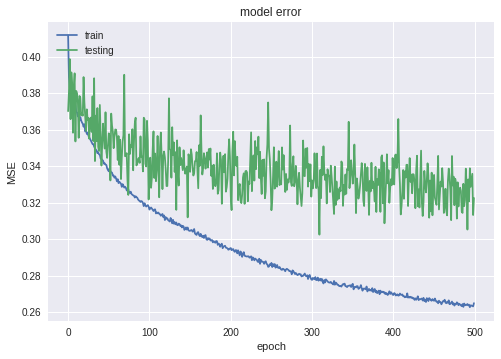

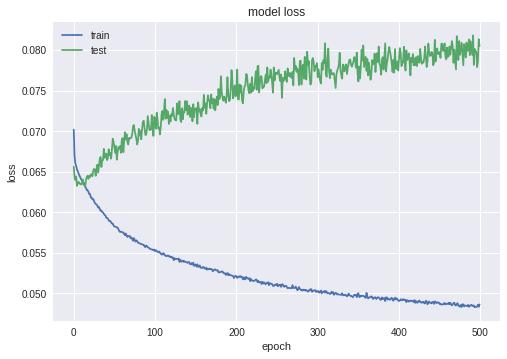

In [2]:

model.save_weights("cnn-class.hdf5")
model.save('cnn_model.h5')
#model.load_weights("rnn.hdf5")
plt.plot(history.history['mean_absolute_error'])
#print(history.history['val_acc'])
#print(history.history['acc'])

plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'testing'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

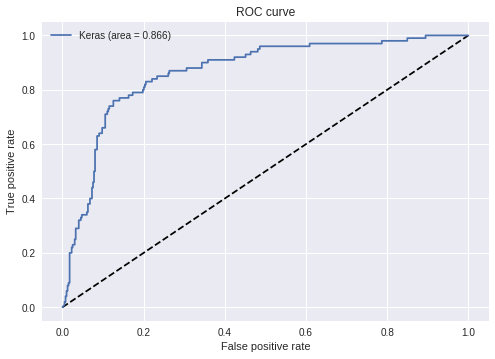

In [3]:
# Classification and ROC analysis
# Import General Libraries 
#model.load_weights("rnn.hdf5")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import sklearn
from keras.models import load_model
# Returns a compiled model identical to the previous one
#model = load_model("cnn-class.hdf5")
#model.load_weights(filepath, by_name=False) 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
X_test = predictors[301:800,:]
y_test = target[301:800]

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
